In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0:
      Successfully uninstalled scipy-1.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
openc

In [ ]:
# 1. Setup
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from gensim import corpora, models
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# 2. Load Data
reviews = pd.read_csv("/content/B097SFBSB4 - Acejoz 200Pcs Assorted Color Charms for Jewelry Ma 2025-07-18.csv")
reviews = reviews[['Body', 'Rating']].dropna()
reviews = reviews.rename(columns={'Body': 'reviewText', 'Rating': 'overall'})

In [ ]:
# 3. Sentiment Analysis
reviews['sentiment'] = reviews['reviewText'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [ ]:
reviews_sorted = reviews.sort_values(by='sentiment', ascending=True)
reviews_sorted[['reviewText', 'sentiment','overall']]

,reviewText,sentiment,overall
94,Holes are so small for the bracelet Disappointed,-0.500000,1
25,Beware it comes with a pentagram! Not happy wi...,-0.500000,1
79,Was disappointed as about half of the color ch...,-0.458333,1
54,I have only used these charms for about 3 days...,-0.408333,1
26,I made friendship bracelets with my friends an...,-0.400000,1
...,...,...,...
71,"They are beautiful!! Great quality, perfect fo...",0.933333,5
184,Awesome! Made the birthday party. The kids lov...,0.937500,5
46,soo cute 10/10!!!!,1.000000,5
188,Perfect for my granddaughter,1.000000,5


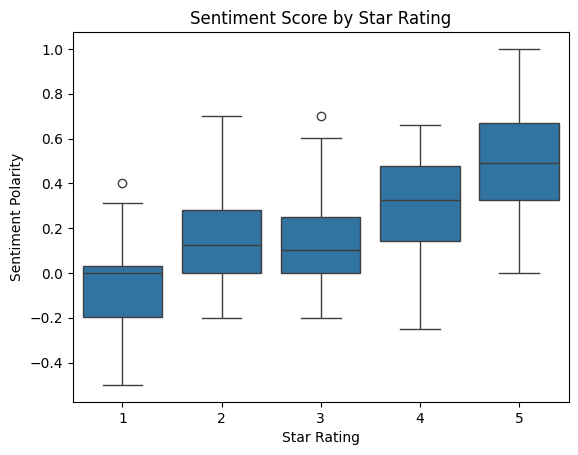

In [ ]:
# 4. Visualization
sns.boxplot(data=reviews, x='overall', y='sentiment')
plt.title('Sentiment Score by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Sentiment Polarity')
plt.show()

/tmp/ipython-input-1032568786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=reviews, x='overall', palette='viridis')


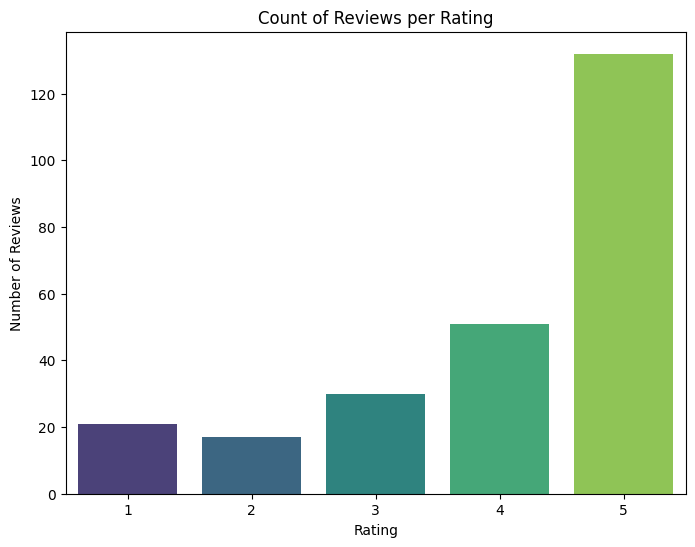

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=reviews, x='overall', palette='viridis')
plt.title('Count of Reviews per Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
# 5. Topic Modeling
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(str(text).lower())
    return [w for w in tokens if w.isalpha() and w not in stop_words and len(w) > 2]

reviews['tokens'] = reviews['reviewText'].apply(preprocess)

In [ ]:
reviews

,reviewText,overall,sentiment,tokens
0,Love this assortment. Usually when i order I’l...,5,0.466667,"[love, assortment, usually, order, get, good, ..."
1,They don’t feel cheep,5,0.000000,"[feel, cheep]"
2,I was excited to receive this 200-piece charm ...,5,0.305853,"[excited, receive, charm, lot, overall, happy,..."
3,"So cute, used it to make some lip balm charms....",5,0.500000,"[cute, used, make, lip, balm, charms, gives, b..."
4,Very disappointed that half the colored charms...,3,0.174750,"[disappointed, half, colored, charms, christma..."
...,...,...,...,...
246,There is a great assortment of beads. They mak...,5,0.750000,"[great, assortment, beads, make, good, earring..."
247,These charms were perfect for jewelry making! ...,5,0.687500,"[charms, perfect, jewelry, making, worked, wel..."
248,"I liked they are good weight , nice colors and...",5,0.675000,"[liked, good, weight, nice, colors, great, sel..."
249,I am so happy with my purchase! Above and beyo...,5,0.252778,"[happy, purchase, beyond, expectations, charms..."


In [ ]:
dictionary = corpora.Dictionary(reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)
lda_model.show_topics()

[(0,
  '0.059*"charms" + 0.020*"cute" + 0.013*"good" + 0.013*"get" + 0.011*"make" + 0.011*"quality" + 0.011*"variety" + 0.011*"christmas" + 0.010*"lot" + 0.008*"bracelets"'),
 (1,
  '0.035*"cute" + 0.028*"charms" + 0.018*"good" + 0.015*"perfect" + 0.014*"super" + 0.013*"great" + 0.011*"bought" + 0.011*"loved" + 0.010*"love" + 0.010*"tarnish"'),
 (2,
  '0.043*"charms" + 0.022*"great" + 0.018*"variety" + 0.015*"love" + 0.014*"quality" + 0.011*"good" + 0.011*"making" + 0.011*"nice" + 0.010*"cute" + 0.010*"used"')]

In [ ]:
dictionary = corpora.Dictionary(reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=20)
lda_model.print_topics()

[(0,
  '0.014*"cute" + 0.013*"charms" + 0.010*"super" + 0.010*"one" + 0.009*"quality" + 0.009*"like" + 0.008*"product" + 0.008*"much" + 0.008*"great" + 0.008*"made"'),
 (1,
  '0.061*"charms" + 0.023*"cute" + 0.020*"good" + 0.017*"variety" + 0.017*"great" + 0.012*"bracelets" + 0.011*"love" + 0.010*"quality" + 0.010*"making" + 0.009*"make"')]

# Filter for <=3 ratings

In [ ]:
negative_reviews = reviews[reviews['overall'] <= 3]
negative_reviews['tokens'] = negative_reviews['reviewText'].apply(preprocess)

/tmp/ipython-input-2551902449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['tokens'] = negative_reviews['reviewText'].apply(preprocess)


In [ ]:
dictionary = corpora.Dictionary(negative_reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in negative_reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)
lda_model.print_topics()

[(0,
  '0.033*"charms" + 0.013*"product" + 0.011*"received" + 0.011*"one" + 0.011*"like" + 0.011*"made" + 0.009*"half" + 0.009*"muy" + 0.009*"quality" + 0.008*"feel"'),
 (1,
  '0.031*"charms" + 0.020*"get" + 0.018*"cute" + 0.015*"ones" + 0.015*"really" + 0.012*"quality" + 0.012*"lot" + 0.012*"use" + 0.012*"match" + 0.012*"tarnished"'),
 (2,
  '0.079*"charms" + 0.026*"cute" + 0.026*"christmas" + 0.015*"ones" + 0.013*"disappointed" + 0.013*"picture" + 0.011*"good" + 0.011*"super" + 0.011*"pack" + 0.010*"get"')]

# Adding common phrases

In [ ]:
from gensim.models import Phrases
bigram = Phrases(reviews['tokens'], min_count=3, threshold=5)
bigram_mod = Phrases(bigram[reviews['tokens']])
reviews['tokens'] = [bigram[doc] for doc in reviews['tokens']]

In [ ]:
reviews

,reviewText,overall,sentiment,tokens
0,Love this assortment. Usually when i order I’l...,5,0.466667,"[love, assortment, usually, order, get, good, ..."
1,They don’t feel cheep,5,0.000000,"[feel, cheep]"
2,I was excited to receive this 200-piece charm ...,5,0.305853,"[excited, receive, charm, lot, overall, happy,..."
3,"So cute, used it to make some lip balm charms....",5,0.500000,"[cute, used, make, lip, balm, charms, gives, b..."
4,Very disappointed that half the colored charms...,3,0.174750,"[disappointed, half, colored_charms, christmas..."
...,...,...,...,...
246,There is a great assortment of beads. They mak...,5,0.750000,"[great, assortment, beads, make, good, earring..."
247,These charms were perfect for jewelry making! ...,5,0.687500,"[charms, perfect, jewelry_making, worked, well..."
248,"I liked they are good weight , nice colors and...",5,0.675000,"[liked, good, weight, nice, colors, great_sele..."
249,I am so happy with my purchase! Above and beyo...,5,0.252778,"[happy_purchase, beyond, expectations, charms,..."


In [ ]:
dictionary = corpora.Dictionary(reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)
lda_model.print_topics()

[(0,
  '0.044*"charms" + 0.017*"cute" + 0.014*"love" + 0.014*"get" + 0.013*"great" + 0.013*"color" + 0.011*"use" + 0.010*"nice" + 0.010*"good" + 0.009*"one"'),
 (1,
  '0.051*"charms" + 0.022*"cute" + 0.013*"many" + 0.013*"really" + 0.009*"lot" + 0.009*"ones" + 0.008*"great" + 0.008*"super_cute" + 0.008*"bracelets" + 0.008*"good"'),
 (2,
  '0.022*"variety" + 0.021*"charms" + 0.017*"quality" + 0.008*"price" + 0.008*"bracelets" + 0.008*"expected" + 0.007*"set" + 0.007*"fun" + 0.007*"different" + 0.007*"looking"')]

In [ ]:
negative_reviews = reviews[reviews['overall'] <= 3]
negative_reviews['tokens'] = negative_reviews['reviewText'].apply(preprocess)
dictionary = corpora.Dictionary(negative_reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in negative_reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)
lda_model.print_topics()

/tmp/ipython-input-1734944771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['tokens'] = negative_reviews['reviewText'].apply(preprocess)


[(0,
  '0.029*"charms" + 0.015*"product" + 0.012*"quality" + 0.012*"one" + 0.010*"picture" + 0.009*"like" + 0.009*"really" + 0.009*"received" + 0.009*"get" + 0.009*"made"'),
 (1,
  '0.021*"cute" + 0.015*"muy" + 0.014*"get" + 0.014*"super" + 0.014*"tarnished" + 0.014*"really" + 0.011*"ones" + 0.011*"use" + 0.011*"quality" + 0.011*"son"'),
 (2,
  '0.087*"charms" + 0.022*"christmas" + 0.019*"cute" + 0.014*"ones" + 0.013*"get" + 0.012*"good" + 0.011*"many" + 0.011*"disappointed" + 0.011*"buy" + 0.011*"pack"')]

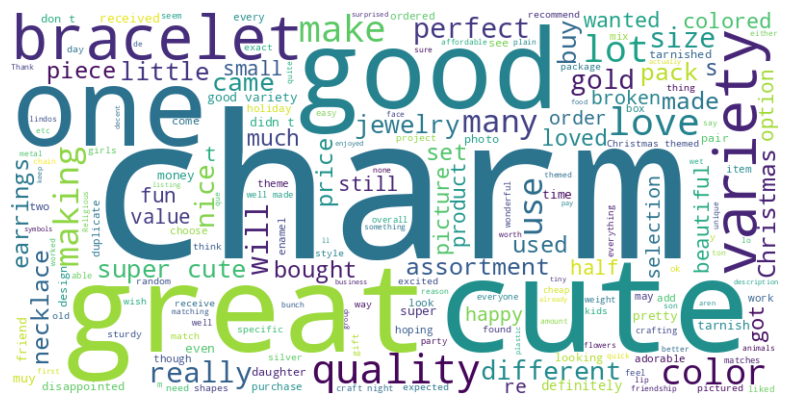

In [ ]:
from wordcloud import WordCloud

text = " ".join(reviews['reviewText'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Trying facebook model

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline

# Load the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
candidate_labels = [
    "high quality",
    "poor quality",
    "cute design",
    "great variety",
    "broken or damaged",
    "good value",
    "not worth the price",
    "colorful assortment",
    "perfect for gifts",
    "disappointed with size",
    "good for jewelry making",
    "missing items",
    "child-friendly",
    "easy to use"
]

In [ ]:
review = "The charms are beautiful but a few arrived broken."

result = classifier(review, candidate_labels, multi_label=False)

print("Predicted label:", result['labels'][0])
print("Confidence:", result['scores'][0])


Predicted label: broken or damaged
Confidence: 0.3969348967075348


In [ ]:
reviews['zero_shot_label'] = reviews['reviewText'].apply(
    lambda x: classifier(str(x), candidate_labels, multi_label=False)['labels'][0]
)

In [ ]:
reviews

,reviewText,overall,sentiment,tokens,zero_shot_label
0,Love this assortment. Usually when i order I’l...,5,0.466667,"[love, assortment, usually, order, get, good, ...",colorful assortment
1,They don’t feel cheep,5,0.000000,"[feel, cheep]",high quality
2,I was excited to receive this 200-piece charm ...,5,0.305853,"[excited, receive, charm, lot, overall, happy,...",good value
3,"So cute, used it to make some lip balm charms....",5,0.500000,"[cute, used, make, lip, balm, charms, gives, b...",cute design
4,Very disappointed that half the colored charms...,3,0.174750,"[disappointed, half, colored_charms, christmas...",good value
...,...,...,...,...,...
246,There is a great assortment of beads. They mak...,5,0.750000,"[great, assortment, beads, make, good, earring...",good for jewelry making
247,These charms were perfect for jewelry making! ...,5,0.687500,"[charms, perfect, jewelry_making, worked, well...",good for jewelry making
248,"I liked they are good weight , nice colors and...",5,0.675000,"[liked, good, weight, nice, colors, great_sele...",high quality
249,I am so happy with my purchase! Above and beyo...,5,0.252778,"[happy_purchase, beyond, expectations, charms,...",high quality


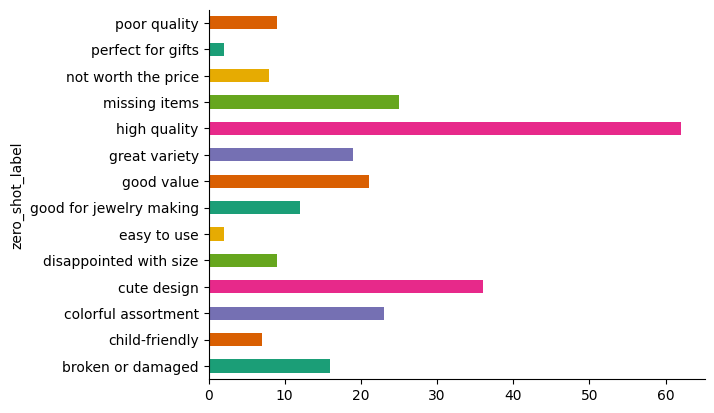

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
reviews.groupby('zero_shot_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
reviews[reviews['zero_shot_label'] == 'high quality']

,reviewText,overall,sentiment,tokens,zero_shot_label
1,They don’t feel cheep,5,0.000000,"[feel, cheep]",high quality
12,"Todos lo dijes son muy bonitos, llegaron bien ...",5,0.000000,"[todos, dijes, son, muy, bonitos, llegaron, bi...",high quality
14,These charms are great! There were a ton of th...,5,0.875000,"[charms, great, ton, good_quality, like, varie...",high quality
16,I ordered two of these packages because I want...,5,0.142308,"[ordered, two, packages, wanted, make_earrings...",high quality
17,The charms seem great and sturdy and as expect...,3,0.237500,"[charms, seem, great, sturdy, expected, ordere...",high quality
...,...,...,...,...,...
240,thanks,5,0.200000,[thanks],high quality
245,Loved these ! I used them for making custom ch...,5,0.583333,"[loved, used, making, custom, charm_bracelets,...",high quality
248,"I liked they are good weight , nice colors and...",5,0.675000,"[liked, good, weight, nice, colors, great_sele...",high quality
249,I am so happy with my purchase! Above and beyo...,5,0.252778,"[happy_purchase, beyond, expectations, charms,...",high quality
